In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
df=pd.read_csv("card.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [9]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [10]:
df.shape

(8950, 18)

In [11]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [12]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [13]:
df["MINIMUM_PAYMENTS"]=df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())#minumum payment s ta 313 tane null değeri görüyoruz veri bütünlüğünü sağlamak için minimum paymentsdaki değerlerin ortalaması alınır ve null değerler yerine yazılır.

In [14]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [15]:
#inplace=True: Bu parametre, işlemi DataFrame üzerinde gerçekleştireceğini ve geri dönüş değeri olarak yeni bir DataFrame döndürmeyeceğini belirtir. Eğer inplace=True olarak ayarlanmazsa, .dropna() işlemi sonucunda yeni bir DataFrame döndürülür ve esas DataFrame değiştirilmez.
df.dropna(inplace=True)

In [16]:
df.describe().T # Bu özellik istatistik tablosunun transpozunu alır yani sütunları satırlara ve satırları sütunlara dönüştürür.

,count,mean,std,min,25%,50%,75%,max
BALANCE,8949.0,1564.647593,2081.584016,0.000000,128.365782,873.680279,2054.372848,19043.13856
BALANCE_FREQUENCY,8949.0,0.877350,0.236798,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8949.0,1003.316936,2136.727848,0.000000,39.800000,361.490000,1110.170000,49039.57000
ONEOFF_PURCHASES,8949.0,592.503572,1659.968851,0.000000,0.000000,38.000000,577.830000,40761.25000
INSTALLMENTS_PURCHASES,8949.0,411.113579,904.378205,0.000000,0.000000,89.000000,468.650000,22500.00000
CASH_ADVANCE,8949.0,978.959616,2097.264344,0.000000,0.000000,0.000000,1113.868654,47137.21176
PURCHASES_FREQUENCY,8949.0,0.490405,0.401360,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8949.0,0.202480,0.298345,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8949.0,0.364478,0.397451,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8949.0,0.135141,0.200132,0.000000,0.000000,0.000000,0.222222,1.50000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'BALANCE'),
  Text(1, 0, 'BALANCE_FREQUENCY'),
  Text(2, 0, 'PURCHASES'),
  Text(3, 0, 'ONEOFF_PURCHASES'),
  Text(4, 0, 'INSTALLMENTS_PURCHASES'),
  Text(5, 0, 'CASH_ADVANCE'),
  Text(6, 0, 'PURCHASES_FREQUENCY'),
  Text(7, 0, 'ONEOFF_PURCHASES_FREQUENCY'),
  Text(8, 0, 'PURCHASES_INSTALLMENTS_FREQUENCY'),
  Text(9, 0, 'CASH_ADVANCE_FREQUENCY'),
  Text(10, 0, 'CASH_ADVANCE_TRX'),
  Text(11, 0, 'PURCHASES_TRX'),
  Text(12, 0, 'CREDIT_LIMIT'),
  Text(13, 0, 'PAYMENTS'),
  Text(14, 0, 'MINIMUM_PAYMENTS'),
  Text(15, 0, 'PRC_FULL_PAYMENT'),
  Text(16, 0, 'TENURE')])

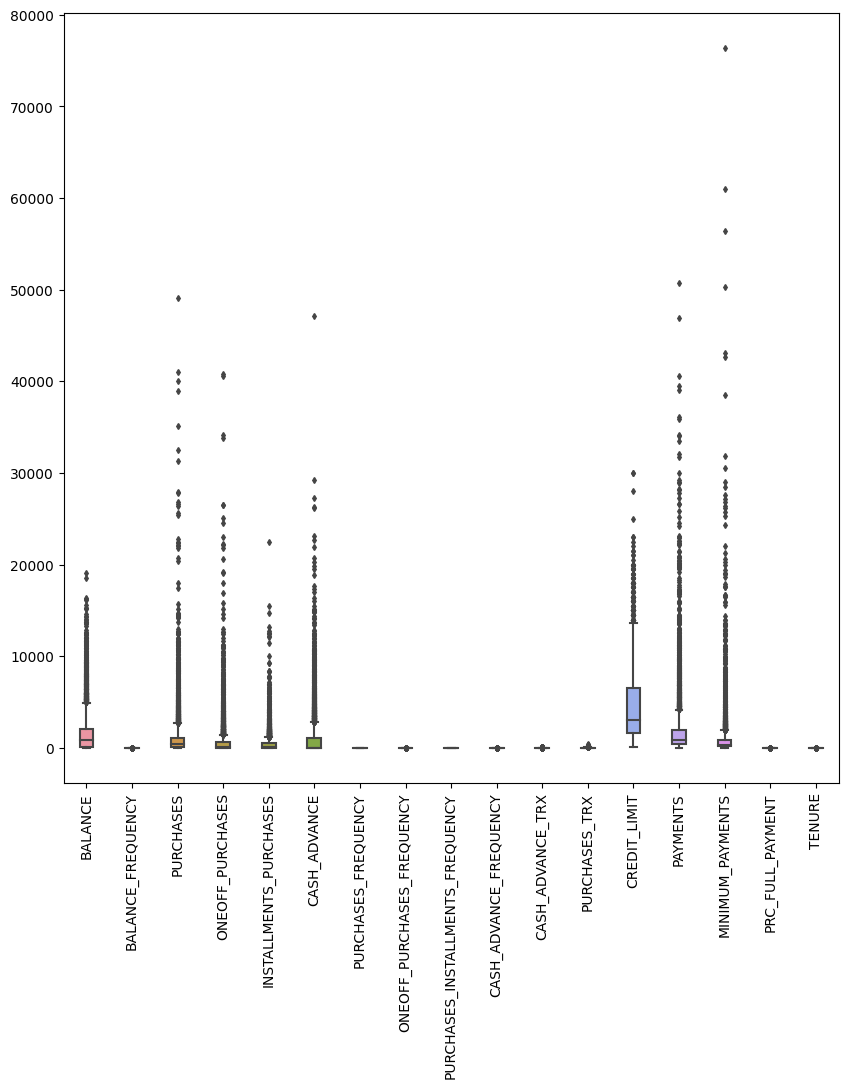

In [17]:
fig, ax=plt.subplots(figsize=(10,10))#çizim alanının (genişlik,yükseklik) değerini belirtiyoruz. "ax"bir alt ve bir üst eksen oluşturarak figsize boyutunda çizim alanı oluşturuyoruz.
sns.boxplot(df, ax=ax, width=.3, fliersize=3)#width kutuların genişliği fliersize ise uç noktaların boyutlarını belirtir.
plt.xticks(rotation=90)#etiketleri döndürme açımızı yazıyoruz

In [18]:
q=df["MINIMUM_PAYMENTS"].quantile(.99)#Bu değer, yüksek değerlerin yüzde 1'ini temsil eder ve bu yüzde değeri aykırı (outlier) değerlerin belirlenmesinde kullanılır.
cdf=df[df["MINIMUM_PAYMENTS"]<q]#Bu satır, yüzde 99'uncu quantile değerinden küçük olan "MINIMUM_PAYMENTS" sütunundaki verileri seçer ve yeni bir DataFrame olan cdf içine kopyalar. cdf DataFrame'i, "MINIMUM_PAYMENTS" sütunundaki yüksek değerleri temizlemiş bir alt küme içerecektir.Yüksek değerlerin istenmeyen etkilerini azaltmak amacıyla yapılır.

In [19]:
q=cdf["PAYMENTS"].quantile(.99)
cdf=cdf[cdf["PAYMENTS"]<q]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'BALANCE'),
  Text(1, 0, 'BALANCE_FREQUENCY'),
  Text(2, 0, 'PURCHASES'),
  Text(3, 0, 'ONEOFF_PURCHASES'),
  Text(4, 0, 'INSTALLMENTS_PURCHASES'),
  Text(5, 0, 'CASH_ADVANCE'),
  Text(6, 0, 'PURCHASES_FREQUENCY'),
  Text(7, 0, 'ONEOFF_PURCHASES_FREQUENCY'),
  Text(8, 0, 'PURCHASES_INSTALLMENTS_FREQUENCY'),
  Text(9, 0, 'CASH_ADVANCE_FREQUENCY'),
  Text(10, 0, 'CASH_ADVANCE_TRX'),
  Text(11, 0, 'PURCHASES_TRX'),
  Text(12, 0, 'CREDIT_LIMIT'),
  Text(13, 0, 'PAYMENTS'),
  Text(14, 0, 'MINIMUM_PAYMENTS'),
  Text(15, 0, 'PRC_FULL_PAYMENT'),
  Text(16, 0, 'TENURE')])

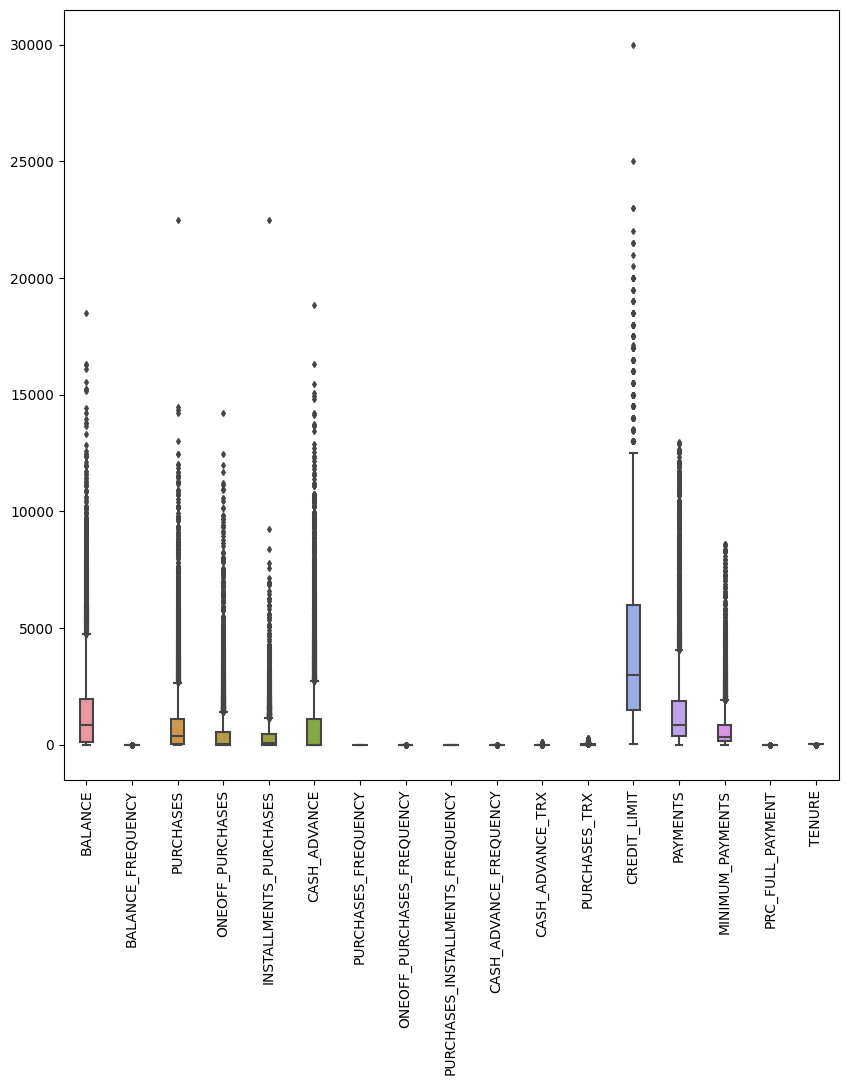

In [20]:
fig, ax=plt.subplots(figsize=(10,10))
sns.boxplot(cdf, ax=ax , width=.3,fliersize=3)
plt.xticks(rotation=90)

In [21]:
cdf.shape

(8770, 18)

In [22]:
col=cdf.columns.tolist()#DataFrame içindeki sütun isimlerini bir Python liste olarak alır.
col=col[1::]#ifadesi, listenin ikinci elemandan (indeks 1) başlayarak sonuna kadar olan elemanlarını seçer. Bu, listenin ilk elemanını (genellikle veri setinin indeks sütunu) atlamayı sağlar.

C:\Users\hasan\AppData\Local\Temp\ipykernel_15784\559934369.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cdf, x=cdf[i], shade=True)
C:\Users\hasan\AppData\Local\Temp\ipykernel_15784\559934369.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cdf, x=cdf[i], shade=True)
C:\Users\hasan\AppData\Local\Temp\ipykernel_15784\559934369.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cdf, x=cdf[i], shade=True)
C:\Users\hasan\AppData\Local\Temp\ipykernel_15784\559934369.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update y

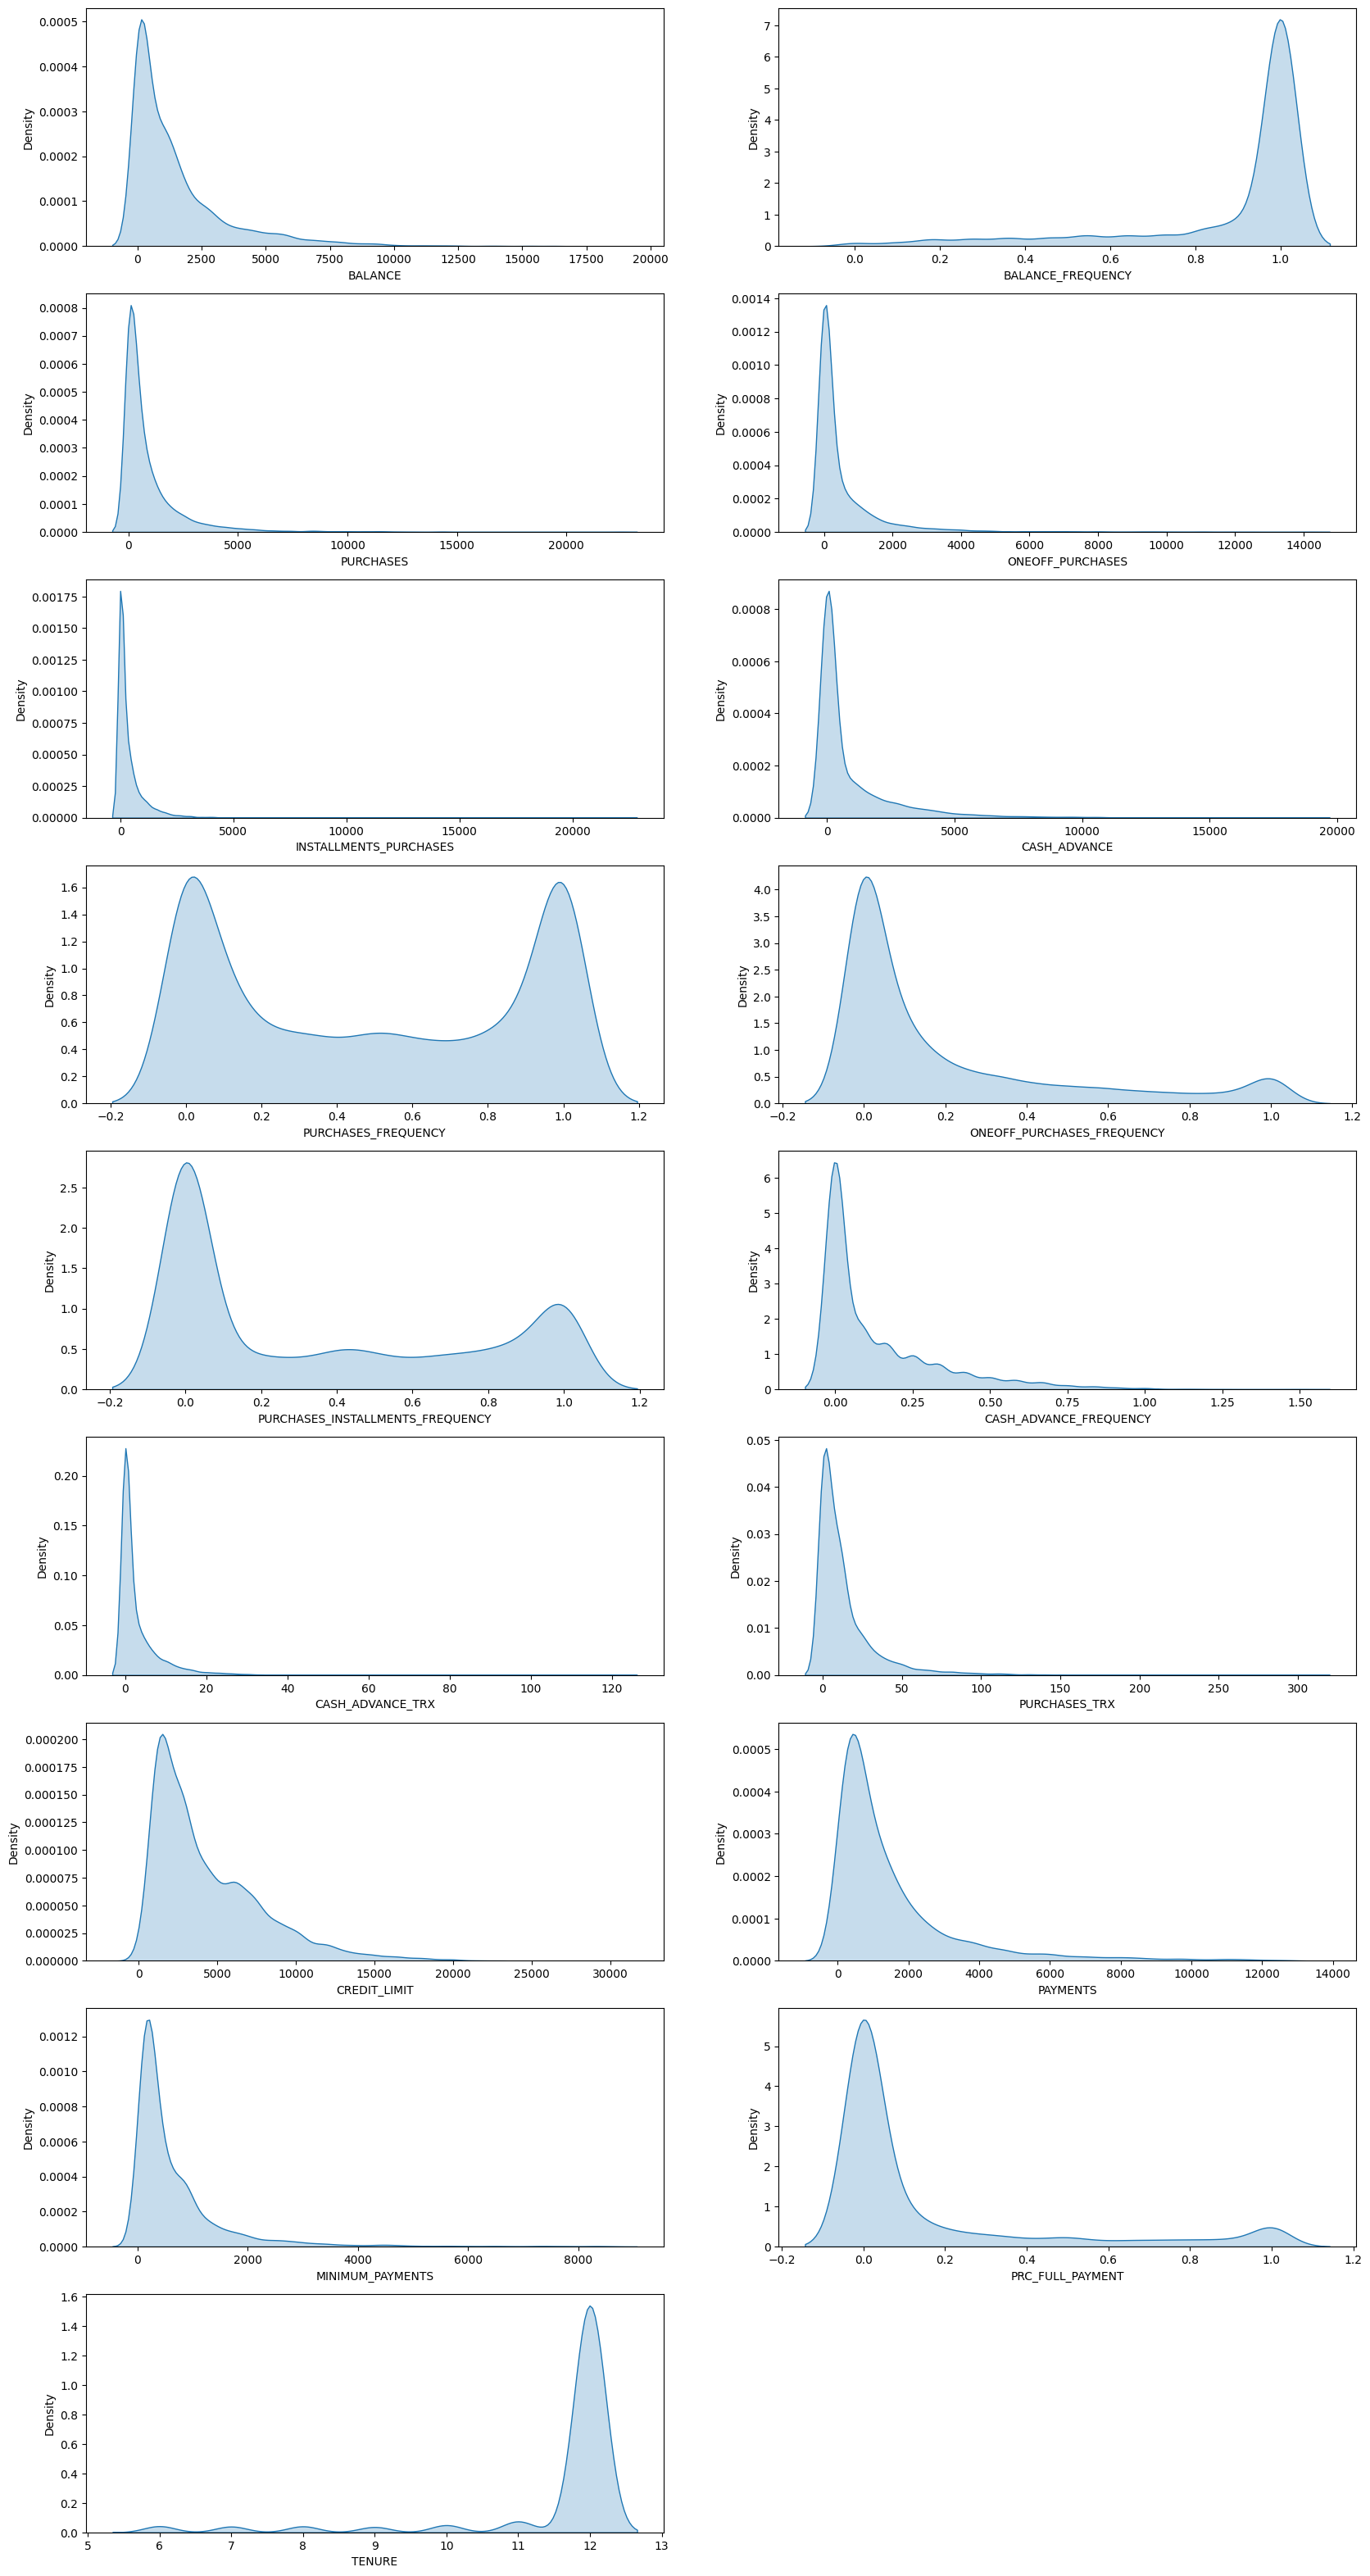

In [23]:
plt.figure(figsize=(20,40))
plot=1

for i in col:
    if plot<18:
        plt.subplot(9,2,plot)
        sns.kdeplot(cdf, x=cdf[i], shade=True)
    plot+=1

plt.show()
#Seaborn kütüphanesi kullanılarak DataFrame içindeki belirli sayıda sütunun çekirdek yoğunluk tahmini (kernel density estimation - KDE) grafiği ile görselleştirilmesini sağlıyoruz.


In [24]:
cdf.drop('CUST_ID', axis=1, inplace=True)#cust_ıd yi çıkartıyoruz.

<Axes: >

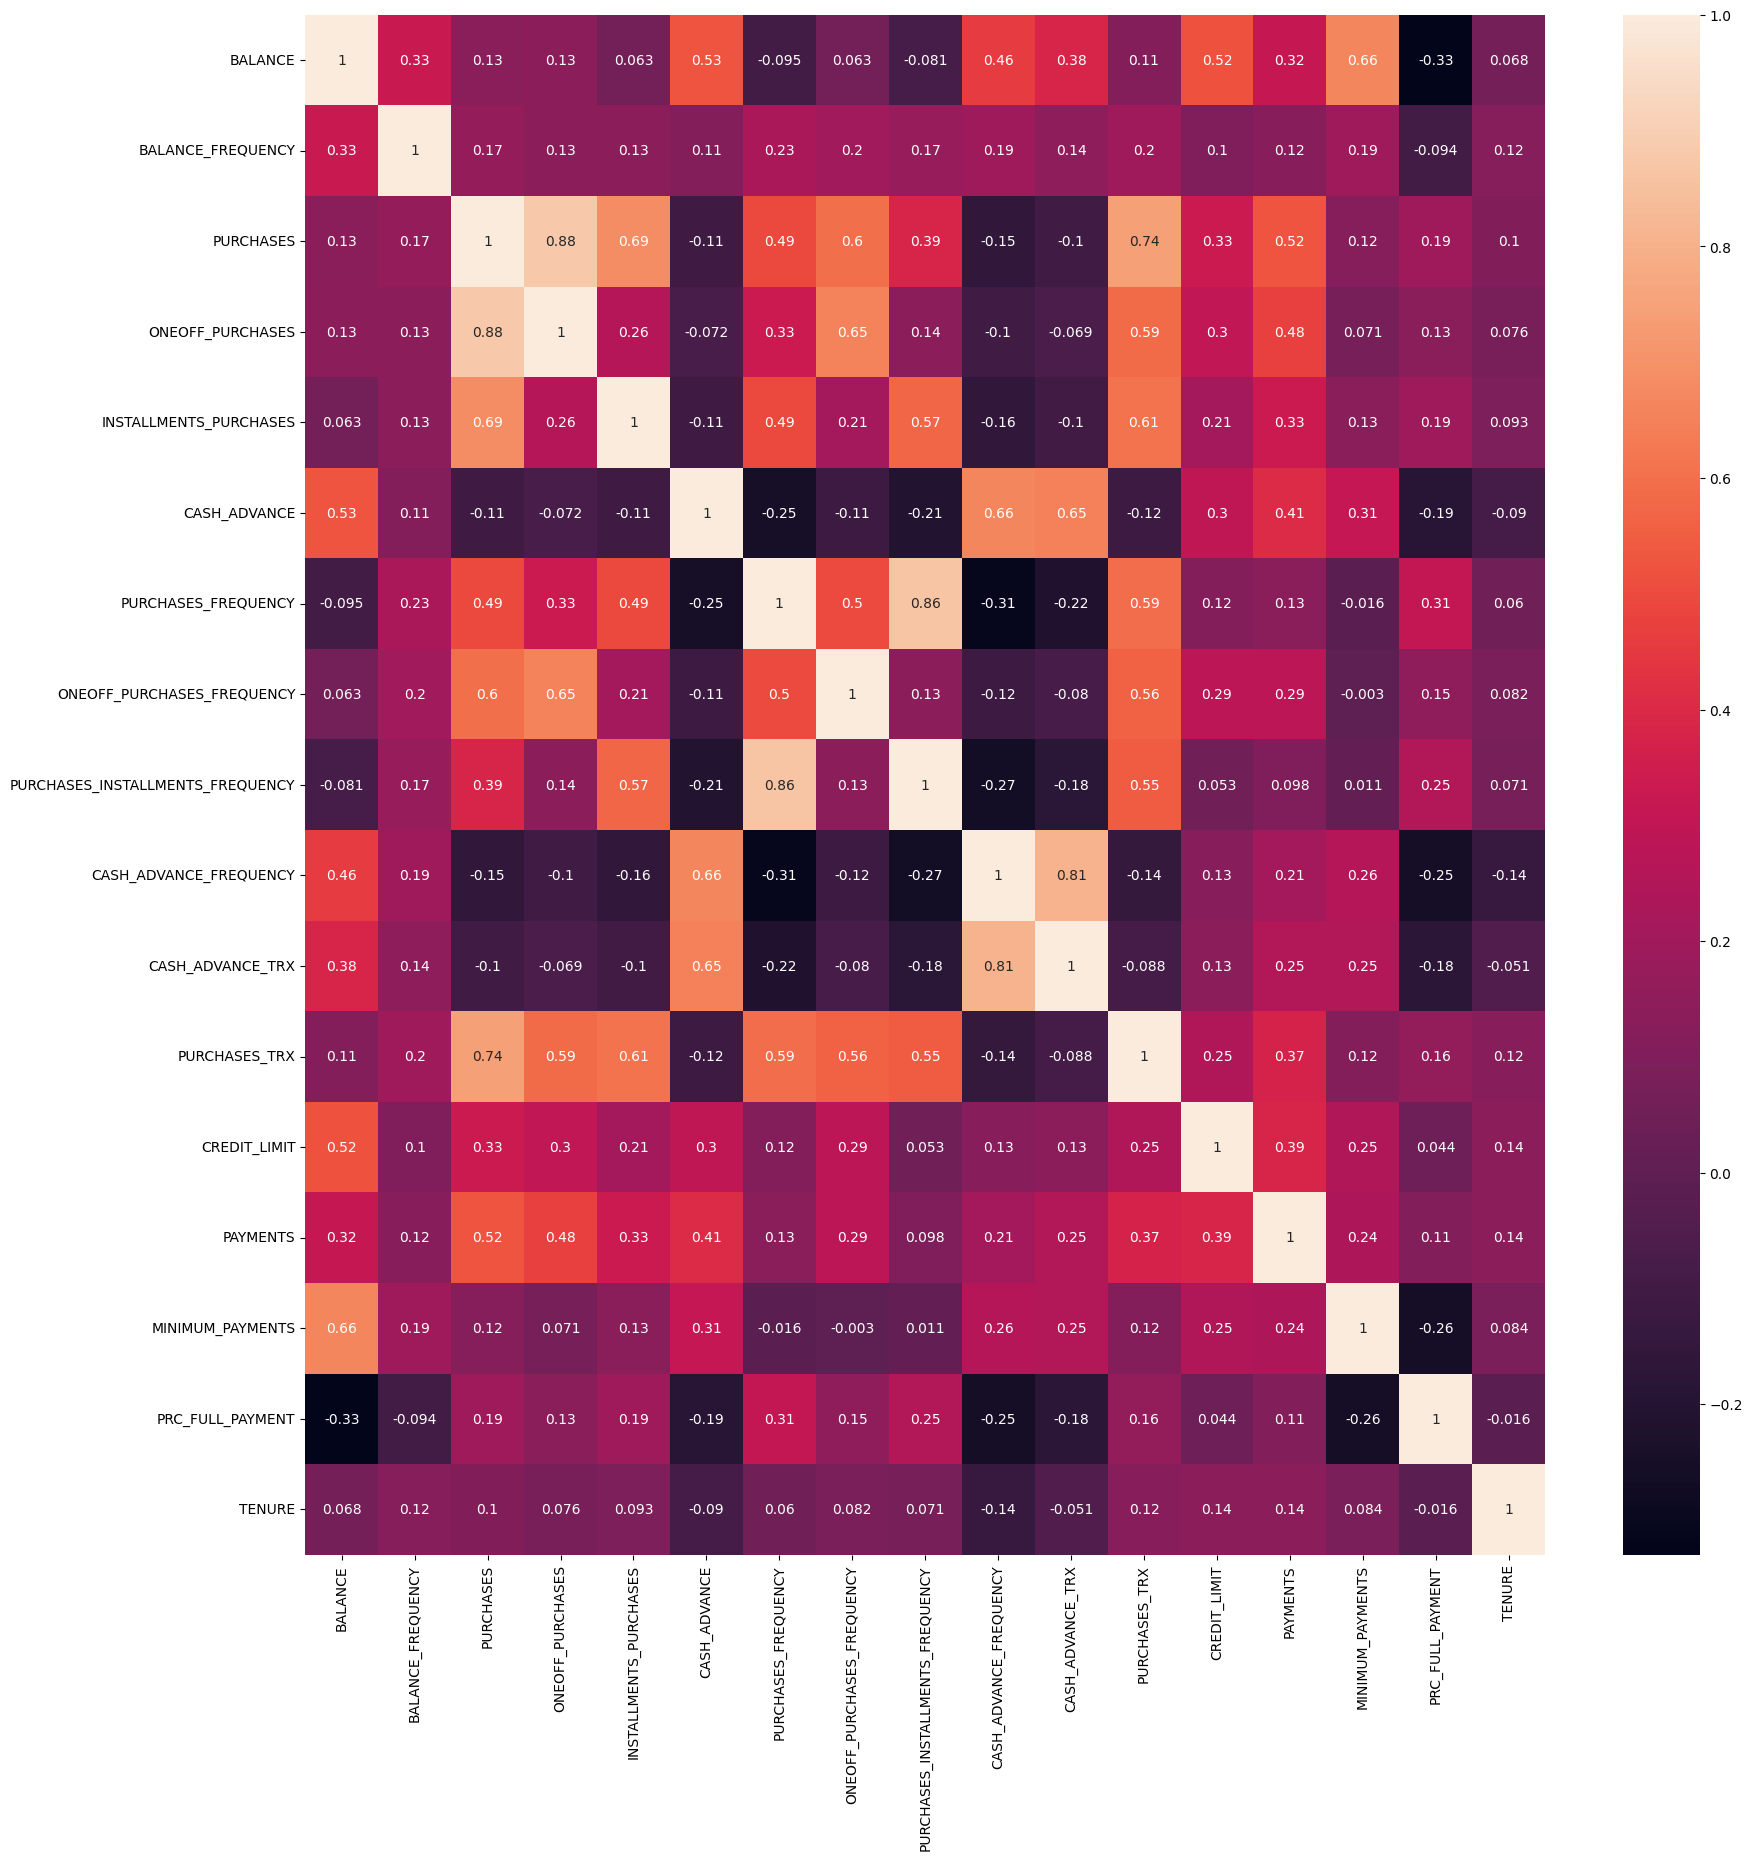

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(cdf.corr(), annot=True)#korelasyon

In [26]:
cdf.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [28]:
cdf_scaled=scaler.fit_transform(cdf)

In [29]:
X=np.array(cdf_scaled)

In [30]:
X

array([[-0.73291766, -0.24675275, -0.53976595, ..., -0.57653697,
        -0.52486366,  0.36332349],
       [ 0.84995333,  0.13669499, -0.60317443, ...,  0.42463467,
         0.23477937,  0.36332349],
       [ 0.49582699,  0.52014272, -0.08927996, ..., -0.0530265 ,
        -0.52486366,  0.36332349],
       ...,
       [-0.74168025, -0.1828469 , -0.50719766, ..., -0.63781103,
         0.32973561, -4.09310588],
       [-0.74665737, -0.1828469 , -0.60317443, ..., -0.66642715,
         0.32973561, -4.09310588],
       [-0.56679489, -0.88583231,  0.12346412, ..., -0.63151035,
        -0.52486366, -4.09310588]])

In [31]:
from sklearn.cluster import KMeans

In [32]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k , init="k-means++" , random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)#WCSS değerlerini hesaplamak için farklı küme sayılarıyla K-Means algoritmasını uyguladık. Daha sonra bu değerleri 'wcss' listesine ekledik.

c:\Users\hasan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hasan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hasan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hasan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

In [33]:
wcss

[149090.00000000017,
 123115.73814219193,
 104303.29740111635,
 92110.84783987788,
 85350.206724223,
 79554.9670605504,
 74449.63723291666,
 71277.7909950112,
 68398.02152972507,
 65721.73723841616]

In [34]:
kmeans.labels_

array([6, 8, 3, ..., 5, 5, 5])

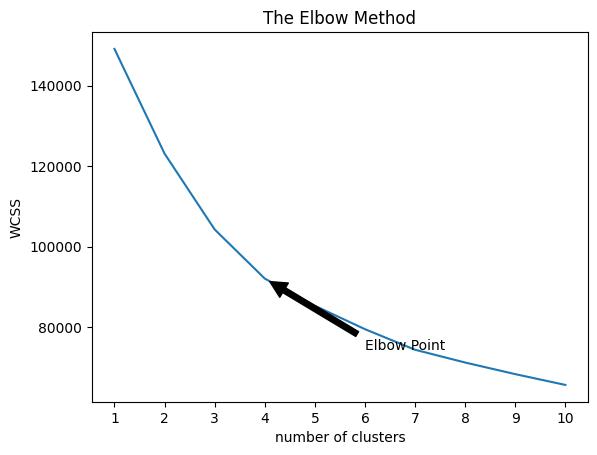

In [35]:
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.title("The Elbow Method")
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.annotate('Elbow Point', xy=(4, wcss[3]), xytext=(6, wcss[6]),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()#WCSS değerlerinin küme sayısına göre grafiğini çizdiriyoruz. Dirsek noktasının belirlendiği ve optimal küme sayısını belirlemek için kullanılan Elbow Methodunu kullanırız.


In [36]:
kmeans=KMeans(n_clusters=4 , init="k-means++", random_state=0)
y_kmeans=kmeans.fit_predict(X)#Verileri 4 küme içerisinde gruplamak için K-Means algoritması kullanılır. Başlangıç merkezlerinin iyileştirilmiş versiyonu olan 'k-means++' yöntemi tercih edilir. Rastgelelik kontrolü için belirtilen random_state kullanılır.

c:\Users\hasan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [37]:
y_kmeans#veri noktasının hangi kümeye ait olduğunu gösterir.

array([0, 1, 3, ..., 3, 0, 0])

In [38]:
cdf['cluster']=y_kmeans

In [39]:
cdf1=cdf[cdf.cluster==0]
cdf2=cdf[cdf.cluster==1]
cdf3=cdf[cdf.cluster==2]
cdf4=cdf[cdf.cluster==3]



In [40]:
cdf.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,3
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,2
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,3
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,0
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


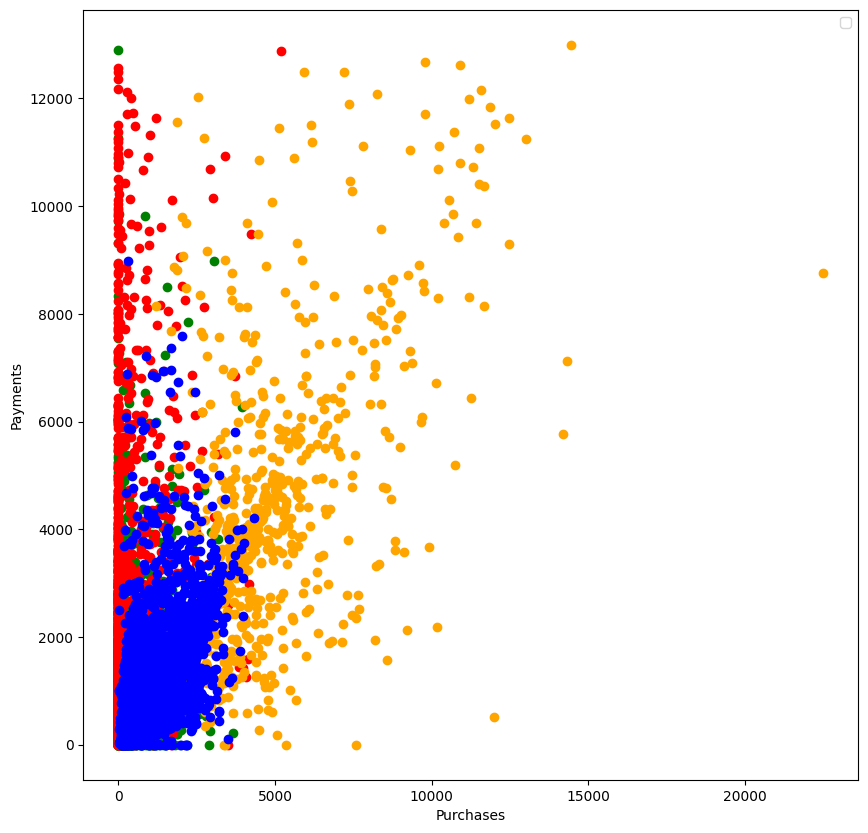

In [41]:
plt.figure(figsize=(10,10))

plt.scatter(cdf1['PURCHASES'], cdf1["PAYMENTS"], color='green')
plt.scatter(cdf2['PURCHASES'], cdf2["PAYMENTS"], color='red')
plt.scatter(cdf3['PURCHASES'], cdf3["PAYMENTS"], color='orange')
plt.scatter(cdf4['PURCHASES'], cdf4["PAYMENTS"], color='blue')


plt.xlabel("Purchases")
plt.ylabel("Payments")
plt.legend()

In [42]:
sse=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(cdf[['PURCHASES',"PAYMENTS"]])
    sse.append(kmeans.inertia_)

c:\Users\hasan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hasan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hasan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hasan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

In [43]:
df_pca=cdf.drop(["cluster"], axis=1)

In [44]:
df_pca

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [45]:
pca = PCA(.95)
principalComponents = pca.fit_transform(df_pca)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2','pc3', 'pc4','pc5'])#PCA tekniği, veri kümesini daha düşük boyutlu bir uzaya yansıtarak verinin önemli özelliklerini korur.

In [46]:
pca.explained_variance_ratio_

array([0.56117672, 0.15731448, 0.14192893, 0.07328167, 0.03260388])

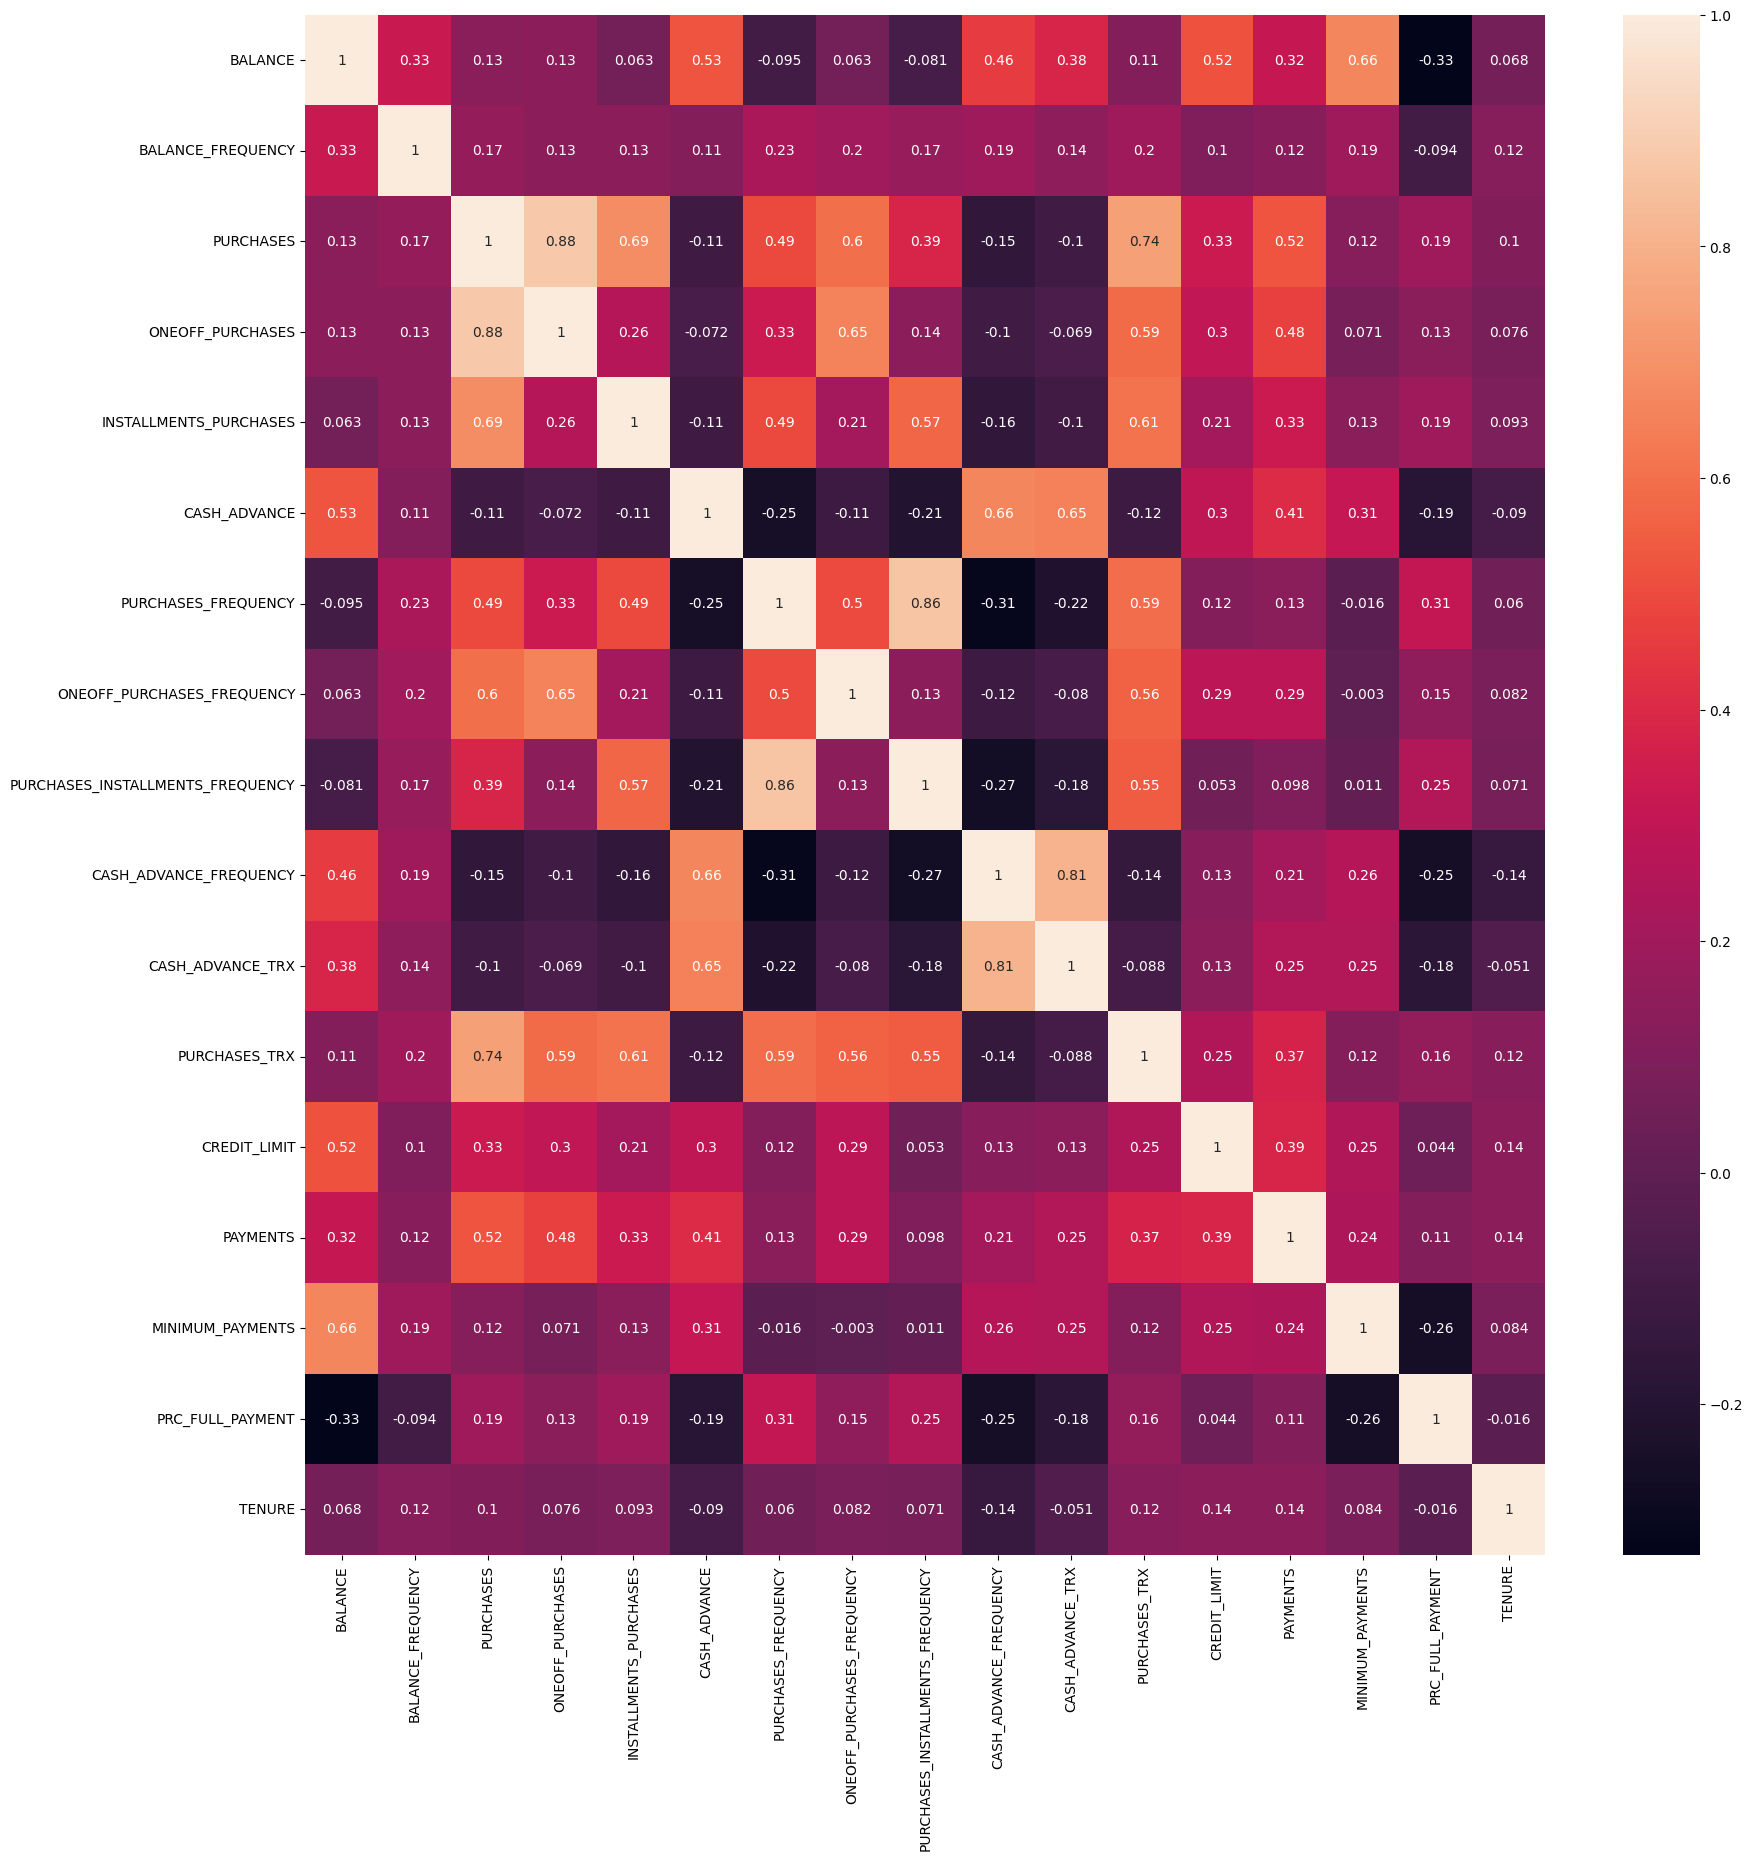

In [47]:
corr = df_pca.corr()
plt.figure(figsize=(20,20))
ax = sns.heatmap(corr, annot=True)